In [3]:
import matplotlib.pyplot as plt

C:\Users\SWAPNIL\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [5]:
Width=135
Height=85
BATCH_SIZE=64
CHANNELS=3
EPOCHS=30

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Oil Ageing",
    shuffle=True,
    image_size=(Width,Height),
    batch_size=BATCH_SIZE
)

Found 5858 files belonging to 4 classes.


In [6]:
class_names=dataset.class_names
class_names

['Fresh', 'Highly Aged', 'Lightly Aged', 'Moderately Aged']

In [7]:
def get_datset_partitions_tf(ds,train_split=0.7,val_split=0.15,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds=get_datset_partitions_tf(dataset)

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
TEST_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale=tf.keras.Sequential ([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [11]:
n_classes=4 
INPUT_SHAPE=(BATCH_SIZE,256,256,CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=INPUT_SHAPE)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (64, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (64, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (64, 60, 60, 64)         

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30


64/64 [==============================] - 156s 2s/step - loss: 0.7874 - accuracy: 0.6183 - val_loss: 0.4873 - val_accuracy: 0.7788
Epoch 2/30
64/64 [==============================] - 112s 2s/step - loss: 0.3694 - accuracy: 0.8478 - val_loss: 0.2616 - val_accuracy: 0.8774
Epoch 3/30
64/64 [==============================] - 108s 2s/step - loss: 0.2160 - accuracy: 0.9159 - val_loss: 0.1395 - val_accuracy: 0.9543
Epoch 4/30
64/64 [==============================] - 113s 2s/step - loss: 0.1078 - accuracy: 0.9606 - val_loss: 0.0965 - val_accuracy: 0.9651
Epoch 5/30
64/64 [==============================] - 113s 2s/step - loss: 0.1168 - accuracy: 0.9582 - val_loss: 0.0723 - val_accuracy: 0.9748
Epoch 6/30
64/64 [==============================] - 114s 2s/step - loss: 0.0860 - accuracy: 0.9675 - val_loss: 0.0510 - val_accuracy: 0.9808
Epoch 7/30
64/64 [==============================] - 114s 2s/step - loss: 0.0447 - accuracy: 0.9830 - val_loss: 0.0544 - val_accuracy: 0.9760
Epoch 8/30


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

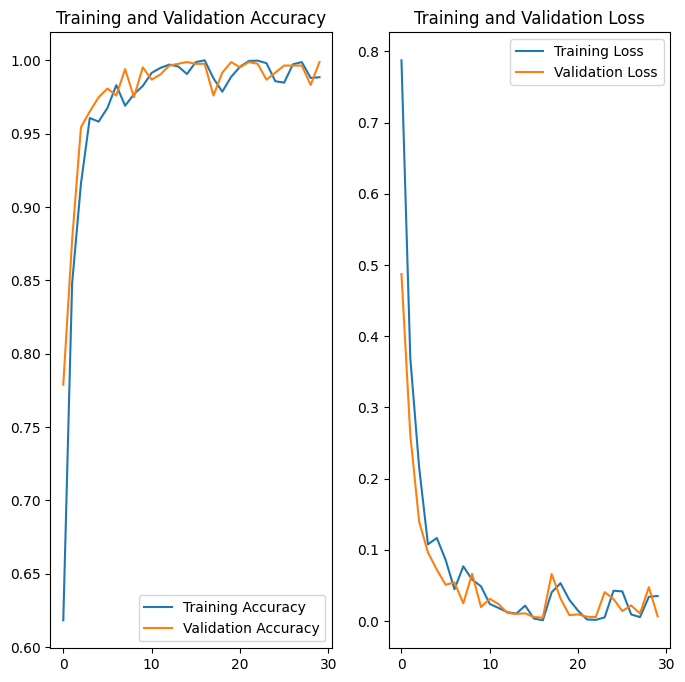

In [17]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
First image's actual label :  Highly Aged
2/2 [==============================] - 1s 169ms/step
1


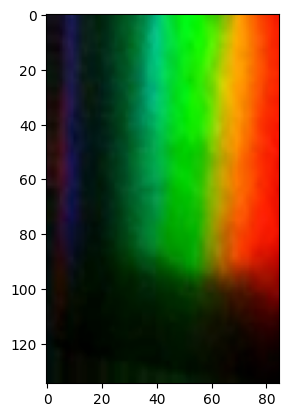

In [18]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label : ",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print(np.argmax(batch_prediction[0]))

In [19]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 27ms/step


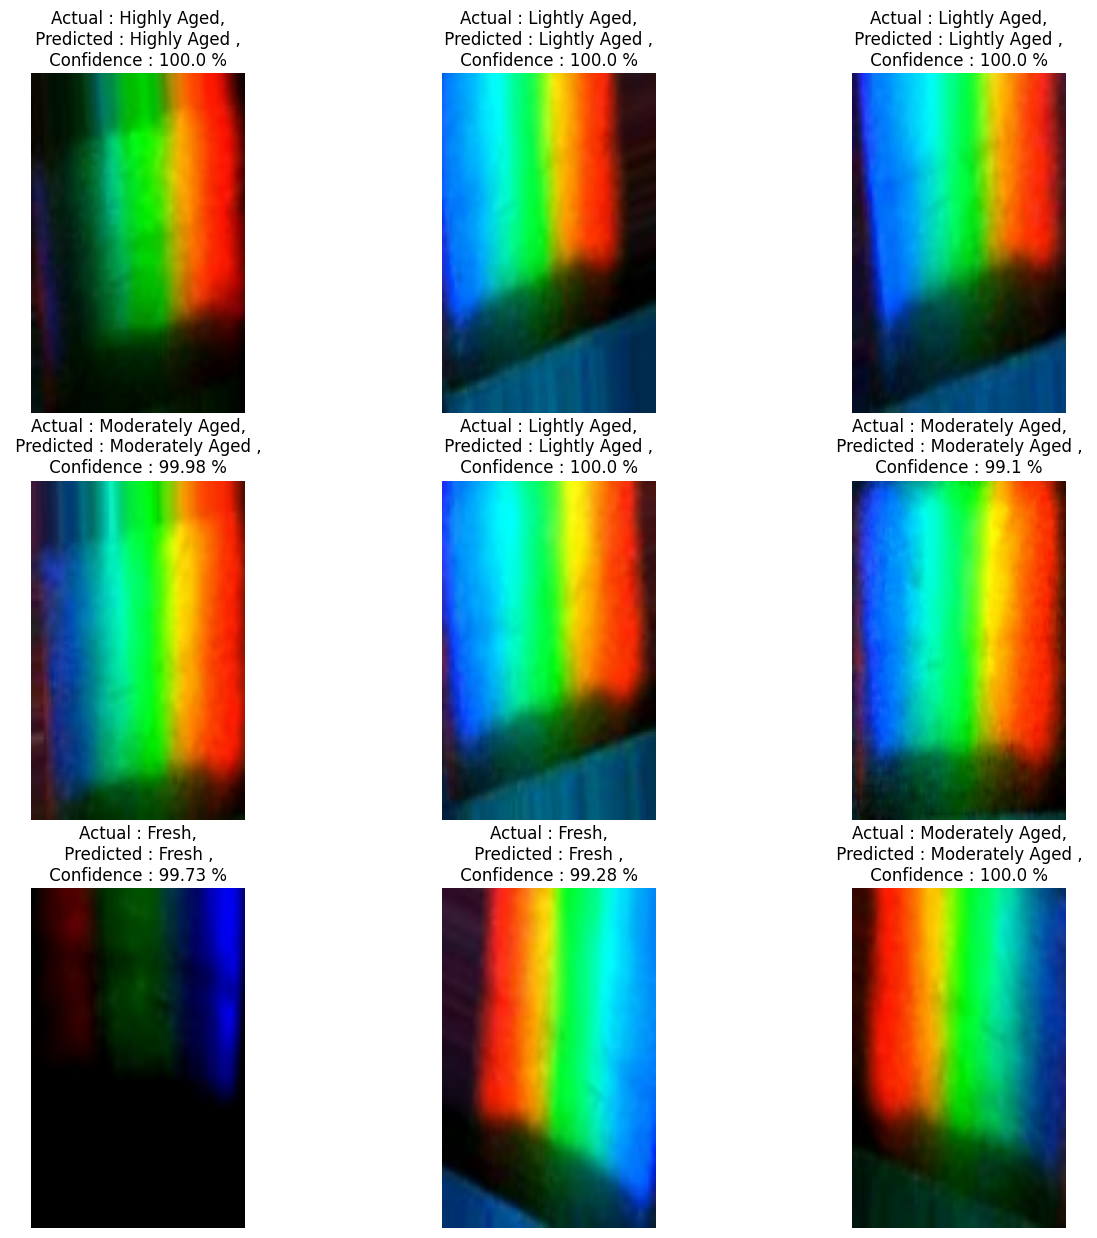

In [20]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class} , \n Confidence : {confidence} % ")
        plt.axis('off')

In [21]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(model,files)